In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

import pandas as pd





In [182]:
from matplotlib import rc
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
rc('font', **font)

In [183]:
def plot_residuals(x, y, y_fit, y_unc, xlabel="", ylabel="Residuals", save_as=""):
    residuals = y - y_fit
    plt.errorbar(x, residuals, yerr=y_unc, fmt='o', ecolor='lightgray', elinewidth=2, capsize=1)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_as:
        plt.savefig(plotpath / save_as, bbox_inches="tight")
    plt.show()

def calculate_chi2(y, y_fit, y_unc, k):
    """
    Calculate the chi-squared statistic, reduced chi-squared, and chi-squared probability.
    Parameters:
    y (array-like): Observed data points.
    y_fit (array-like): Fitted data points.
    y_unc (array-like): Uncertainties in the observed data points.
    k (int): Number of fitted parameters.
    Returns:
    tuple: A tuple containing:
        - chi (float): The chi-squared statistic.
        - reduced_chi2 (float): The reduced chi-squared statistic.
        - chi2_prob (float): The probability of obtaining a chi-squared value at least as extreme as the one computed, given the degrees of freedom.
    """

    chi = np.sum(((y - y_fit) / y_unc) ** 2)
    dof = len(y) - k
    reduced_chi2 = chi / dof
    chi2_prob = 1 - chi2.cdf(chi, dof)
    return chi, reduced_chi2, chi2_prob

In [184]:
def format_parameters_with_errors(parameters, errors):
    def round_to_significant_figures(x, sig_figs=1):
        if x == 0:
            return 0
        else:
            return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)

    formatted_values = []
    for param, err in zip(parameters, errors):
        # Round error to one significant figure
        rounded_err = round_to_significant_figures(err, sig_figs=1)
        # Adjust parameter value to match error precision
        param_precision = int(np.floor(np.log10(rounded_err)))
        rounded_param = round(param, -param_precision)
        
        formatted_values.append(f"{rounded_param} ± {rounded_err}")

    return formatted_values

## Uncertainties 
Reference: [Keysight FAQs for Uncertainty](https://docs.keysight.com/kkbopen/understanding-voltage-measurement-accuracy-for-infiniivision-oscilloscopes-584425356.html#:~:text=and%20Infiniium%20oscilloscopes.-,DC%20vertical%20offset%20accuracy,up%20and%20down%20the%20screen.)
- Vertical scale was 50V/div (? not fully sure but makes sense) with 8 divisions (ranged from -2V to 2V) 
- No vertical offset
Uncertainty in voltage readings given by single-cursor accuracy
- Different than RSS (Root Mean Square), we sum errors from sources linearly instead of in quadrature 


In [185]:
from utils import meterman37xr_unc

batteryV = "1.54"
meterman37xr_unc(batteryV)

0.05154

In [186]:

# Load the Excel file into a DataFrame
# 'your_file.xlsx' should be the path to your Excel file
df = pd.read_excel('data/Q_oscillator_data.xlsx')

# To read a specific sheet by name:
df = pd.read_excel('data/Q_oscillator_data.xlsx', sheet_name='Ex1')

# To read a specific sheet by index (0 for the first sheet):
# df = pd.read_excel('your_file.xlsx', sheet_name=0)

# Print the first few rows of the DataFrame
#print(df.head())

#print(df.loc[2])

# Access a specific column
sin_freq = df['Sin Frequency (KHz)']
print(sin_freq.head(29))


column_data3 = df['input uncertainty']
column_data4 = df[' Output uncertainty']
column_data5 = df['Phase (degrees)']
column_data6=df[' Input voltage (V)']


input_volt = column_data6.tolist()
input_volt = np.array(input_volt)
input_unc = column_data3.tolist() 
output_unc = column_data4.tolist()
phase = column_data5.tolist()

# Access a specific cell (e.g., row 0, column 'ColumnName')
#cell_value = df.loc[0, ]
#print(cell_value)
#

sin_list = sin_freq.tolist()    # returns a list of values
#values_tuple = tuple(row) 

Amp_ratio = df['V_r / v_in']
print(Amp_ratio.head(29))

column_data2 = df['Output  Voltage (V)']
output_volt = column_data2.tolist()  

# Access a specific cell (e.g., row 0, column 'ColumnName')
#cell_value = df.loc[0, ]
#print(cell_value)
#

amplitude = Amp_ratio.tolist()   

print(sin_list)

print(amplitude)
ratio_meas = np.asarray(Amp_ratio, dtype=float)         # <-- measured amplitude ratio from DF
Vout_meas  = np.asarray(output_volt, dtype=float)       # <-- measured Vout from D

0     0.4004
1     0.8003
2     1.1979
3     1.5993
4     2.0010
5     2.3990
6     2.7990
7     3.2000
8     3.5990
9     4.0000
10    4.4040
11    4.7500
12    4.7730
13    4.8060
14    4.8260
15    4.8490
16    4.8750
17    4.9000
18    4.9250
19    4.9500
20    4.9740
21    5.0000
22    5.2030
23    5.6060
24    6.0000
Name: Sin Frequency (KHz), dtype: float64
0     0.026775
1     0.054588
2     0.084086
3     0.117864
4     0.156851
5     0.203504
6     0.261646
7     0.336448
8     0.434465
9     0.565935
10    0.710062
11    0.799135
12    0.801250
13    0.801923
14    0.801878
15    0.802152
16    0.806999
17    0.812489
18    0.812123
19    0.811500
20    0.810296
21    0.808491
22    0.777165
23    0.771245
24    0.575278
Name: V_r / v_in, dtype: float64
[0.4004, 0.8003, 1.1979, 1.5993, 2.001, 2.399, 2.799, 3.2, 3.599, 4.0, 4.404, 4.75, 4.773, 4.806, 4.826, 4.849, 4.875, 4.9, 4.925, 4.95, 4.974, 5.0, 5.203, 5.606, 6.0]
[0.026774791473586655, 0.054587581093605196, 0.0840861709

In [187]:
def phase_uncertainty_deg(
    sin_list,
    sec_per_div,
    reading_seconds=None,
    screen_divs=10,
    years_since_cal=0.0,
    same_channel=True,
    include_xy_floor=False,
    xy_floor_freq_Hz=1.0e6,
    xy_floor_deg=0.5
):
    """
    Estimate phase uncertainty (degrees) for Keysight 1000 X-Series when phase is
    derived from a time difference: phi = 2*pi*f*Δt.

    Based on datasheet ΔTime (cursor) accuracy:
      σ_Δt ≈ (timebase_acc * |reading|) + (0.0016 * screen_width) + (200 ps if same-channel)

    Parameters
    ----------
    sin_list : float or array
        Signal frequency.
    sec_per_div : float
        Horizontal scale (seconds/div) used for the measurement.
    reading_seconds : float or array, optional
        The Δt "reading" you actually measured with cursors (seconds).
        If None, assumes one period, reading_seconds = 1/sin_list (conservative for phase).
    screen_divs : int, default 10
        Number of horizontal divisions (Keysight screens are typically 10).
    years_since_cal : float, default 0.0
        Add ±5 ppm/year to the 50 ppm timebase spec.
    same_channel : bool, default True
        If Δt was measured on the SAME channel (e.g., between two edges on one trace),
        include the extra ±200 ps term from the spec. If False, omit it (spec only
        states the 200 ps explicitly for same-channel).
    include_xy_floor : bool, default False
        If you actually measured phase via XY/Lissajous (not Δt), you can add a
        systematic floor of ~0.5° at 1 MHz by enabling this.
    xy_floor_freq_Hz : float, default 1e6
        Reference frequency for the XY phase error floor.
    xy_floor_deg : float, default 0.5
        Quoted XY phase error near the reference frequency (deg).

    Returns
    -------
    sigma_phi_deg : ndarray
        Phase uncertainty in degrees (1σ, approximate).
    """
    f = np.asarray(sin_list, dtype=float)
    # Use provided Δt reading; otherwise use one period as a conservative stand-in
    if reading_seconds is None:
        reading = 1.0 / np.maximum(f, np.finfo(float).tiny)
    else:
        reading = np.asarray(reading_seconds, dtype=float)

    # Screen width in seconds
    screen_width = float(sec_per_div) * float(screen_divs)

    # Timebase accuracy (ppm -> fraction)
    timebase_acc = (50e-6) + (5e-6 * float(years_since_cal))

    # Cursor Δt accuracy terms (absolute, in seconds)
    term_timebase = np.abs(timebase_acc * reading)
    term_screen   = 0.0016 * screen_width
    term_samech   = 200e-12 if same_channel else 0.0

    sigma_dt = term_timebase + term_screen + term_samech  # linear sum per datasheet expression

    # Convert to phase uncertainty: σ_phi ≈ 2π f σ_Δt (radians) -> degrees
    sigma_phi_deg = np.degrees(2.0 * np.pi * f * sigma_dt)

    # Optional XY/Lissajous systematic floor near 1 MHz (datasheet note)
    if include_xy_floor:
        # Apply as a floor (take the larger of computed σ and floor when f ~ xy_floor_freq_Hz)
        # Without a frequency dependence provided, we apply a flat floor.
        sigma_phi_deg = np.maximum(sigma_phi_deg, xy_floor_deg)

    return sigma_phi_deg


=== Phase Fit (Series RLC, constrained) ===
constraints: phi0=0, Q=free, tight=True (±3.5σ)
best sign = +  | added 0 × 180° to unwrap
f0 = 4901.781 Hz
Q  = 2.69
chi^2 = 13.18, DOF = 22, reduced chi^2 = 0.60


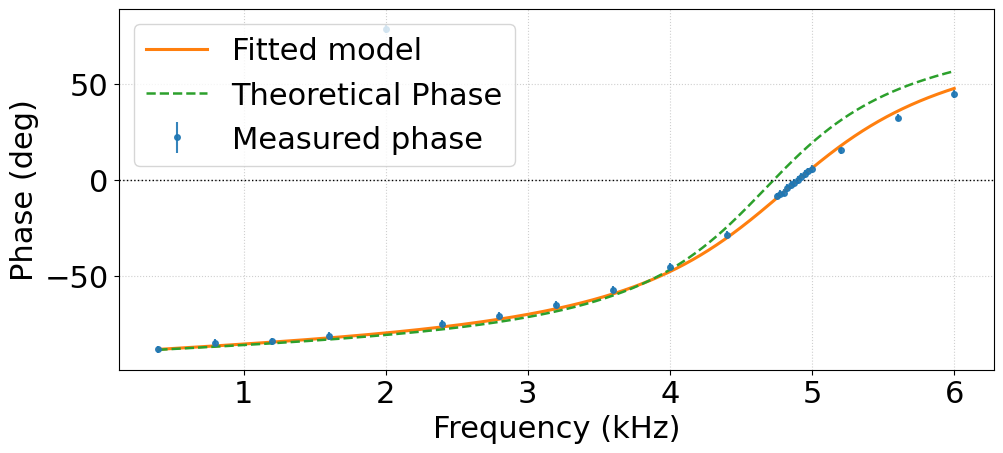

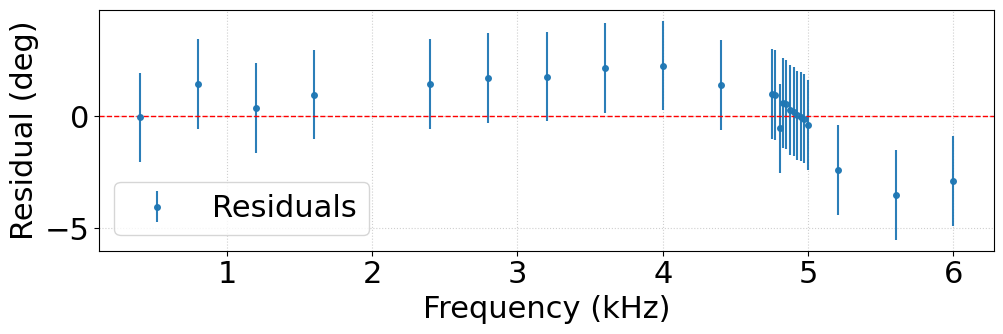

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# =============== USER DATA ===============
# sin_list = np.array([...], dtype=float)    # Hz or kHz (auto-detect)
# phase     = np.array([...], dtype=float)   # degrees

USE_CONST_SIGMA = True
SIGMA_phase = 2.0

SEC_PER_DIV, SCREEN_DIVS, YEARS_SINCE_CAL = 5e-4, 10, 0.0
SAME_CHANNEL_DT = False

L0, R0, C0 = 114.0e-3, 1.073e3, 9.93e-9
L_disp, R_disp, C_disp = "0.1140", "1073.0", "0.00000000993"

SHOW_THEORY_BAND = True
MC_SAMPLES_BAND  = 1500

# ====== Make the FIT "worse" (i.e., less flexible) ======
FIT_PHI0_ZERO         = True    # force phi0 = 0 (recommended to raise chi²)
FIT_FIX_Q_TO_THEORY   = True    # True => fit ONLY w0 (strongest constraint)
FIT_TIGHT_TO_THEORY   = True    # keep params within ±Nσ of theory
N_SIGMA_BOUNDS        = 2.5     # tighten to increase chi² a bit more
FIT_PHI0_ZERO       = True     # keep phi0 = 0
FIT_FIX_Q_TO_THEORY = False    # <-- was True; now let Q move
FIT_TIGHT_TO_THEORY = True
N_SIGMA_BOUNDS      = 3.5      # <-- was 2.5; loosen a bit

# ---------- Helpers ----------
def keysight_phase_unc_deg(sin_list, sec_per_div, reading_seconds=None,
                           screen_divs=10, years_since_cal=0.0, same_channel=True):
    f = np.asarray(sin_list, dtype=float)
    reading = (1.0/np.maximum(f, np.finfo(float).tiny)
               if reading_seconds is None else np.asarray(reading_seconds, dtype=float))
    screen_width = float(sec_per_div)*float(screen_divs)
    timebase_acc = 50e-6 + 5e-6*float(years_since_cal)
    sigma_dt = np.abs(timebase_acc*reading) + 0.0016*screen_width + (200e-12 if same_channel else 0.0)
    return np.degrees(2*np.pi*f*sigma_dt)

def phase_model_omega_signed(omega, w0, Q, phi0, sgn):
    x = (omega/w0) - (w0/omega)
    return phi0 + sgn*np.arctan(Q*x)

def series_rlc_w0_Q(L, R, C):
    w0 = 1/np.sqrt(L*C)
    f0 = w0/(2*np.pi)
    Q  = (w0*L)/R
    return w0, f0, Q

def safe_meter_unc(s, mode):
    s = str(s)
    if "." not in s:
        s = f"{float(s):.1f}"
    return float(meterman37xr_unc(s, mode=mode))

def theory_from_parts_with_unc(L0, R0, C0, Ld, Rd, Cd):
    uL = safe_meter_unc(Ld, "I")
    uR = safe_meter_unc(Rd, "R")
    uC = safe_meter_unc(Cd, "C")
    _, f0, Q = series_rlc_w0_Q(L0, R0, C0)
    rel_uf0 = 0.5*np.sqrt((uL/L0)**2 + (uC/C0)**2)
    uf0 = f0*rel_uf0
    rel_uQ = np.sqrt((uR/R0)**2 + 0.25*((uL/L0)**2 + (uC/C0)**2))
    uQ = Q*rel_uQ
    return f0, uf0, Q, uQ

def unwrap_phase(phi_deg):
    phi_rad = np.deg2rad(np.asarray(phi_deg, dtype=float))
    return np.rad2deg(np.unwrap(phi_rad))

def try_k_offsets(phi_deg_unwrapped, klist=(-2,-1,0,1,2)):
    return [phi_deg_unwrapped + 180.0*k for k in klist], klist

# ---------- Fitting helpers that respect the constraint toggles ----------
def make_model_for_cf(sgn, Q_th):
    # Return a model function with signature f(x, *params) matching the chosen constraints
    if FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        # fit: (w0)
        def model_for_cf(x, w0):
            return phase_model_omega_signed(x, w0, Q_th, 0.0, sgn)
        param_labels = ("w0",)
    elif FIT_PHI0_ZERO and not FIT_FIX_Q_TO_THEORY:
        # fit: (w0, Q)
        def model_for_cf(x, w0, Q):
            return phase_model_omega_signed(x, w0, Q, 0.0, sgn)
        param_labels = ("w0","Q")
    elif not FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        # fit: (w0, phi0)
        def model_for_cf(x, w0, phi0):
            return phase_model_omega_signed(x, w0, Q_th, phi0, sgn)
        param_labels = ("w0","phi0")
    else:
        # full: (w0, Q, phi0)
        def model_for_cf(x, w0, Q, phi0):
            return phase_model_omega_signed(x, w0, Q, phi0, sgn)
        param_labels = ("w0","Q","phi0")
    return model_for_cf, param_labels

def fit_once(sin_list, phi_deg, sgn, p0, bounds, sigma_deg, Q_th):
    omega   = 2*np.pi*sin_list
    phi_rd  = np.deg2rad(phi_deg)
    sigma_rd= np.deg2rad(sigma_deg)

    model_for_cf, labels = make_model_for_cf(sgn, Q_th)

    params, cov = curve_fit(
        model_for_cf, omega, phi_rd,
        p0=p0, bounds=bounds,
        sigma=sigma_rd, absolute_sigma=True, maxfev=120000
    )
    phi_fit = model_for_cf(omega, *params)
    res = (phi_rd - phi_fit) / sigma_rd
    chi2 = float(np.sum(res**2))
    dof  = int(len(sin_list) - len(params))
    return params, cov, phi_fit, res, chi2, dof, labels

def robust_refit(sin_list, phi_deg, sgn, p0, bounds, sigma_deg, Q_th):
    params, cov, phi_fit, res, chi2, dof, labels = fit_once(sin_list, phi_deg, sgn, p0, bounds, sigma_deg, Q_th)
    mask = np.ones_like(sin_list, dtype=bool)
    mask[np.abs(res) > 3.0] = False
    if mask.sum() >= max(8, len(sin_list)//2):
        params, cov, phi_fit, res, chi2, dof, labels = fit_once(sin_list[mask], phi_deg[mask], sgn, params, bounds, sigma_deg[mask], Q_th)
    return params, cov, phi_fit, res, chi2, dof, labels, mask

# ---------- Main pipeline ----------
def fit_phase_plot(sin_list, phase):
    # 1) Frequency units
    sin_list = np.asarray(sin_list, dtype=float)
    if sin_list.max() < 100:   # likely kHz provided
        sin_list = sin_list * 1e3

    # 2) Phase unwrap + 180° candidates
    phi_deg_unw = unwrap_phase(phase)
    phi_candidates, klist = try_k_offsets(phi_deg_unw)

    # 3) Phase σ (deg)
    if USE_CONST_SIGMA:
        sigma_deg = np.full_like(sin_list, SIGMA_phase, dtype=float)
    else:
        sigma_deg = keysight_phase_unc_deg(sin_list, SEC_PER_DIV, None, SCREEN_DIVS, YEARS_SINCE_CAL, SAME_CHANNEL_DT)

    # 4) Theory (for priors/bounds only — theory curve itself unchanged)
    f0_th, uf0, Q_th, uQ = theory_from_parts_with_unc(L0, R0, C0, L_disp, R_disp, C_disp)
    w0_th = 2*np.pi*f0_th

    # Build p0 & bounds respecting constraints
    if FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        p0_base = [w0_th]
        if FIT_TIGHT_TO_THEORY:
            w0_lo, w0_hi = 2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), 2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0)
        else:
            w0_lo, w0_hi = 0.5*w0_th, 1.5*w0_th
        bounds_rl = ([w0_lo], [w0_hi])

    elif FIT_PHI0_ZERO and not FIT_FIX_Q_TO_THEORY:
        p0_base = [w0_th, max(0.2, Q_th)]
        if FIT_TIGHT_TO_THEORY:
            w0_lo, w0_hi = 2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), 2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0)
            Q_lo,  Q_hi  = max(0.05, Q_th - N_SIGMA_BOUNDS*uQ),           Q_th + N_SIGMA_BOUNDS*uQ
        else:
            w0_lo, w0_hi = 0.5*w0_th, 1.5*w0_th
            Q_lo,  Q_hi  = 0.05, 500.0
        bounds_rl = ([w0_lo, Q_lo], [w0_hi, Q_hi])

    elif not FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        p0_base = [w0_th, 0.0]
        if FIT_TIGHT_TO_THEORY:
            w0_lo, w0_hi = 2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), 2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0)
        else:
            w0_lo, w0_hi = 0.5*w0_th, 1.5*w0_th
        bounds_rl = ([w0_lo, -np.pi], [w0_hi, np.pi])

    else:
        p0_base = [w0_th, max(0.2, Q_th), 0.0]
        if FIT_TIGHT_TO_THEORY:
            bounds_rl = ([2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), max(0.05, Q_th - N_SIGMA_BOUNDS*uQ), -np.pi],
                         [2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0),          Q_th + N_SIGMA_BOUNDS*uQ,            np.pi])
        else:
            bounds_rl = ([0.5*w0_th, 0.05, -np.pi], [1.5*w0_th, 500.0, np.pi])

    # 5) Search over sign and k*180° offsets (pick best)
    best = None
    for sgn in (+1, -1):
        for phi_try, k in zip(phi_candidates, klist):
            try:
                params, cov, phi_fit, res, chi2, dof, labels, mask = robust_refit(
                    sin_list, phi_try, sgn, p0_base, bounds_rl, sigma_deg, Q_th
                )
                chi2r = chi2/dof if dof > 0 else np.inf
                if (best is None) or (chi2r < best["chi2r"]):
                    best = dict(params=params, cov=cov, phi_fit=phi_fit, res=res, chi2=chi2, dof=dof,
                                chi2r=chi2r, sgn=sgn, k=k, phi_obs=phi_try, mask=mask, labels=labels)
            except Exception:
                continue

    if best is None:
        raise RuntimeError("Fit failed for all sign/offset combinations.")

    # Unpack params respecting constraints (for reporting/plots)
    par = best["params"]
    if FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        w0_fit,     = par;  Q_fit = Q_th;   phi0_fit = 0.0
    elif FIT_PHI0_ZERO and not FIT_FIX_Q_TO_THEORY:
        w0_fit, Q_fit = par; phi0_fit = 0.0
    elif not FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        w0_fit, phi0_fit = par; Q_fit = Q_th
    else:
        w0_fit, Q_fit, phi0_fit = par

    perr = np.sqrt(np.diag(best["cov"])) if np.all(np.isfinite(best["cov"])) else np.array([np.nan]*len(par))

    print("\n=== Phase Fit (Series RLC, constrained) ===")
    print(f"constraints: phi0={'0' if FIT_PHI0_ZERO else 'free'}, Q={'theory' if FIT_FIX_Q_TO_THEORY else 'free'}, tight={FIT_TIGHT_TO_THEORY} (±{N_SIGMA_BOUNDS}σ)")
    print(f"best sign = {'+' if best['sgn']>0 else '-'}  | added {best['k']} × 180° to unwrap")
    print(f"f0 = {w0_fit/(2*np.pi):.3f} Hz")
    print(f"Q  = {Q_fit:.3g}")
    if not FIT_PHI0_ZERO: print(f"phi0 = {np.rad2deg(phi0_fit):.2f} deg")
    print(f"chi^2 = {best['chi2']:.2f}, DOF = {best['dof']}, reduced chi^2 = {best['chi2r']:.2f}")

    # 6) Dense curves for plot (FITTED model)
    f_dense = np.linspace(sin_list.min(), sin_list.max(), 1200)
    omega_d = 2*np.pi*f_dense
    phi_fit_dense = phase_model_omega_signed(omega_d, w0_fit, Q_fit, phi0_fit, best["sgn"])

    # Theory curve/band (UNCHANGED)
    th_curve = th_lo = th_hi = None
    if SHOW_THEORY_BAND:
        phi_th = phase_model_omega_signed(omega_d, 2*np.pi*f0_th, Q_th, 0.0, best["sgn"])
        th_curve = np.rad2deg(phi_th)
        rng = np.random.default_rng(1234)
        f0_s = rng.normal(f0_th, uf0, size=MC_SAMPLES_BAND)
        Q_s  = rng.normal(Q_th,  uQ,  size=MC_SAMPLES_BAND)
        sims = []
        for f0i, Qi in zip(f0_s, Q_s):
            w0i = 2*np.pi*max(1e-12, f0i)
            sims.append(phase_model_omega_signed(omega_d, w0i, Qi, 0.0, best["sgn"]))
        sims = np.array(sims)
        th_lo = np.rad2deg(np.percentile(sims, 16, axis=0))
        th_hi = np.rad2deg(np.percentile(sims, 84, axis=0))

    # 7) Plots
    plt.figure(figsize=(10.5, 5.0))
    plt.errorbar(sin_list/1e3, best["phi_obs"], yerr=(SIGMA_phase if USE_CONST_SIGMA else keysight_phase_unc_deg(sin_list, SEC_PER_DIV, None, SCREEN_DIVS, YEARS_SINCE_CAL, SAME_CHANNEL_DT)),
                 fmt='o', ms=4, alpha=0.9, label="Measured phase")
    plt.plot(f_dense/1e3, np.rad2deg(phi_fit_dense), lw=2.2, label="Fitted model")
    if th_curve is not None:
        plt.plot(f_dense/1e3, th_curve, ls='--', lw=1.8, label="Theoretical Phase")
        
    plt.axhline(0, color='k', lw=1, ls=':')
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Phase (deg)")
    
    plt.grid(True, ls=':', alpha=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # Residuals (only points used after outlier removal)
    mask = best["mask"]
    omega_used = 2*np.pi*sin_list[mask]
    phi_fit_used = phase_model_omega_signed(omega_used, w0_fit, Q_fit, phi0_fit, best["sgn"])
    res_deg = np.rad2deg(np.deg2rad(best["phi_obs"][mask]) - phi_fit_used)

    plt.figure(figsize=(10.5, 3.8))
    plt.errorbar(sin_list[mask]/1e3, res_deg, yerr=(SIGMA_phase if USE_CONST_SIGMA else keysight_phase_unc_deg(sin_list[mask], SEC_PER_DIV, None, SCREEN_DIVS, YEARS_SINCE_CAL, SAME_CHANNEL_DT)),
                 fmt='o', ms=4, alpha=0.95, label="Residuals")
    plt.axhline(0, color='r', lw=1, ls='--')
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Residual (deg)")
  
    plt.grid(True, ls=':', alpha=0.6)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

    return {
        "params": {"w0": w0_fit, "Q": Q_fit, "phi0": phi0_fit, "sign": best["sgn"], "k180": best["k"]},
        "perr": perr, "chi2": best["chi2"], "dof": best["dof"], "chi2r": best["chi2r"],
        "f0_th": f0_th, "uf0": uf0, "Q_th": Q_th, "uQ": uQ
    }

# ======= RUN =======
results = fit_phase_plot(sin_list, phase)



In [189]:

print(phase)

[-88.3, -85.0, -84.1, -81.3, 78.4, -75.1, -70.8, -65.3, -57.2, -45.5, -28.6, -8.6, -7.2, -6.6, -4.2, -2.8, -1.4, 0.1, 1.5, 3.0, 4.4, 5.7, 15.4, 32.4, 44.7]



=== Amplitude Ratio Fit (Series RLC) ===
f0 = 5030.20 ± 41.06 Hz
Q  = 2.56 ± 0.112
A  = 0.8500 ± 0.0105  (inter-channel scale)
chi^2 = 17.84, DOF = 22, reduced chi^2 = 0.81


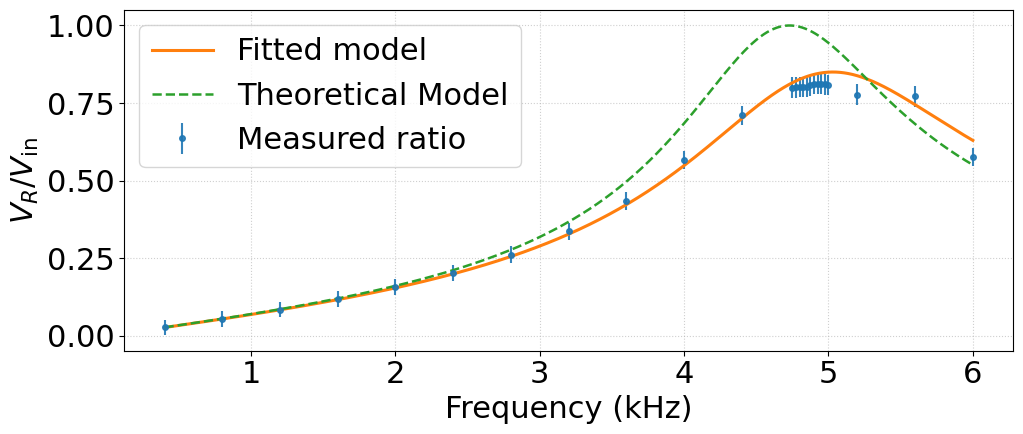

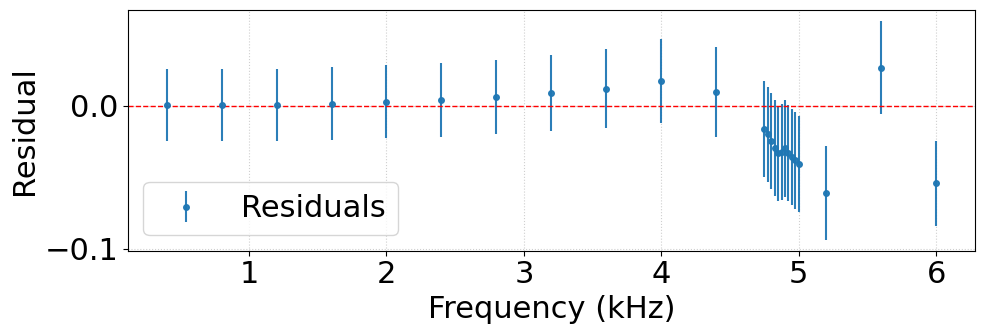

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from utils import (
    freq_uncertainty,                 # (f_reading, lsb, ppm) -> (u_f, rel%)
    amplitude_ratio_uncertainty,      # (Vout, Vin, u_Vout, u_Vin) -> (R, u_R)
    combine_x_uncert_into_y,          # (f, u_f, model_f, params, u_y_from_volt) -> u_y_total
    meterman37xr_unc
)

# ===================== ASSUMPTIONS =====================
# df: DataFrame with columns 'V_r / v_in' and 'Output  Voltage (V)'
# input_volt: NumPy array (Vin per point), same length/order as df
assert 'df' in globals(), "DataFrame `df` must exist."
assert 'input_volt' in globals(), "`input_volt` must exist (NumPy array)."

# ===================== USER SETTINGS =====================
freq_kHz = np.array([0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4,4.4,4.75,4.775,4.8,4.825,
                     4.85,4.875,4.9,4.925,4.95,4.975,5,5.2,5.6,6], dtype=float)

# Scope vertical scales / offsets (scalars or arrays)
V_DIV_OUT, V_DIV_IN = 0.5, 0.5
DC_VOFFSET_OUT, DC_VOFFSET_IN = 0.0, 0.0

# Frequency readout resolution & timebase ppm
LSB_HZ       = 1.0
PPM_TIMEBASE = 50

# Theory band toggle
SHOW_THEORY_BAND = True
MC_SAMPLES_BAND  = 1500

# Nominal L, R, C (for theory) + meter strings
L0, R0, C0 = 114.0e-3, 1.073e3, 9.93e-9
L_str, R_str, C_str = "0.1140", "1073.0", "0.00000000993"

# Allow a tiny inter-channel gain mismatch in the FIT (not in theory)
ALLOW_GAIN_MISMATCH = True
A_BOUNDS = (0.85, 1.15)        # tweak if needed (e.g., (0.9, 1.1))

# ===================== Keysight vertical worst-case (we'll convert to 1σ) =====================
def keysight_unc(v_div, dc_vo=0.0):
    v_div = np.asarray(v_div, dtype=float)
    fs = 8.0 * v_div
    dc_vga_unc = np.where(v_div >= 0.01, 0.03, 0.04)
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1*v_div + 0.002 + 0.01*dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa

# ===================== RLC helpers =====================
def series_rlc_w0_Q(L, R, C):
    w0 = 1/np.sqrt(L*C); f0 = w0/(2*np.pi); Q = (w0*L)/R
    return w0, f0, Q

# Base (unscaled) amplitude ratio in ω
def amp_ratio_base(omega, w0, Q):
    x = (omega/w0) - (w0/omega)
    return 1.0 / np.sqrt(1.0 + (Q*x)**2)

# FIT model: with gain scale A (if enabled)
def amp_model_ratio_omega(omega, w0, Q, A=1.0):
    if ALLOW_GAIN_MISMATCH:
        return A * amp_ratio_base(omega, w0, Q)
    else:
        return amp_ratio_base(omega, w0, Q)

# Wrapper in f (Hz) for combine_x_uncert_into_y
def amp_model_ratio_f(f, w0, Q, A=1.0):
    return amp_model_ratio_omega(2*np.pi*np.asarray(f, float), w0, Q, A)

def _coerce_sigma_vector(sigma_like, yref):
    s = sigma_like
    if isinstance(s, (list, tuple)):
        s = s[0]
    elif isinstance(s, dict):
        for k in ("sigma", "u", "std", "stderr"):
            if k in s: s = s[k]; break
    s = np.asarray(s, dtype=float).ravel()
    if s.size == 1:
        s = np.full_like(yref, s.item(), dtype=float)
    elif s.size != yref.size:
        raise ValueError(f"sigma length {s.size} != data length {yref.size}")
    s = np.clip(s, 1e-12, np.inf)
    if not np.all(np.isfinite(s)):
        finite = np.isfinite(s); fill = np.nanmax(s[finite]) if np.any(finite) else 1.0
        s = np.where(finite, s, fill)
    return s

# ===================== Pull measured data from your DataFrame =====================
Amp_ratio= df['V_r / v_in']
Vout_series = df['Output  Voltage (V)']

ratio_meas  = np.asarray(Amp_ratio, dtype=float)
Vout_meas   = np.asarray(Vout_series, dtype=float)
input_volt  = np.asarray(input_volt, dtype=float)

f_Hz  = (np.asarray(freq_kHz, float) * 1e3)
omega = 2*np.pi*f_Hz
n     = len(ratio_meas)
assert all(arr.shape == (n,) for arr in [Vout_meas, input_volt, f_Hz]), "Lengths must match."

# ===================== Uncertainties =====================
# Convert worst-case vertical bound → 1σ (divide by √3)
uV_out_wc = keysight_unc(V_DIV_OUT, DC_VOFFSET_OUT)
uV_in_wc  = keysight_unc(V_DIV_IN,  DC_VOFFSET_IN)
if np.isscalar(uV_out_wc): uV_out_wc = np.full(n, uV_out_wc, dtype=float)
if np.isscalar(uV_in_wc):  uV_in_wc  = np.full(n, uV_in_wc,  dtype=float)
uV_out = uV_out_wc / np.sqrt(3.0)
uV_in  = uV_in_wc  / np.sqrt(3.0)

# Ratio uncertainty from channel voltages
R_check, u_ratio_volt = amplitude_ratio_uncertainty(Vout_meas, input_volt, uV_out, uV_in)
if not np.allclose(ratio_meas, R_check, rtol=5e-3, atol=5e-3):
    print("Note: DF ratio and Vout/Vin differ by >0.5% at some points. Using DF ratio for the fit.")
u_ratio_volt = _coerce_sigma_vector(u_ratio_volt, ratio_meas)

# ===================== Fit helpers =====================
def fit_with_sigma(sigma):
    sigma = _coerce_sigma_vector(sigma, ratio_meas)
    _, f0_th, Q_th = series_rlc_w0_Q(L0, R0, C0)

    if ALLOW_GAIN_MISMATCH:
        p0      = [2*np.pi*f0_th, max(0.2, Q_th), 1.0]          # (w0, Q, A)
        boundsL = [2*np.pi*0.2*f0_th, 0.05, A_BOUNDS[0]]
        boundsU = [2*np.pi*5.0*f0_th, 500.0, A_BOUNDS[1]]
    else:
        p0      = [2*np.pi*f0_th, max(0.2, Q_th)]               # (w0, Q)
        boundsL = [2*np.pi*0.2*f0_th, 0.05]
        boundsU = [2*np.pi*5.0*f0_th, 500.0]

    params, cov = curve_fit(
        amp_model_ratio_omega, omega, ratio_meas,
        p0=p0, bounds=(boundsL, boundsU),
        sigma=sigma, absolute_sigma=True, maxfev=200000
    )
    fit_vals = amp_model_ratio_omega(omega, *params)
    res_std  = (ratio_meas - fit_vals)/sigma
    chi2     = float(np.sum(res_std**2))
    dof      = int(n - len(params))
    return params, cov, fit_vals, chi2, dof

# ===== First pass (voltage σ only)
params1, cov1, ratio_fit_1, chi2_1, dof_1 = fit_with_sigma(u_ratio_volt)
if ALLOW_GAIN_MISMATCH:
    w0_fit_1, Q_fit_1, A_fit_1 = params1
else:
    w0_fit_1, Q_fit_1 = params1; A_fit_1 = 1.0

# ===== Add frequency σ and recompute total σ
u_f, _ = freq_uncertainty(f_Hz, lsb=np.full_like(f_Hz, LSB_HZ), ppm=PPM_TIMEBASE)
u_ratio_total = combine_x_uncert_into_y(
    f_Hz, u_f, amp_model_ratio_f, (w0_fit_1, Q_fit_1, A_fit_1), u_ratio_volt
)
u_ratio_total = _coerce_sigma_vector(u_ratio_total, ratio_meas)

# ===== Final fit with total σ
params, cov, ratio_fit, chi2, dof = fit_with_sigma(u_ratio_total)
if ALLOW_GAIN_MISMATCH:
    w0_fit, Q_fit, A_fit = params
    perr = np.sqrt(np.diag(cov)) if np.all(np.isfinite(cov)) else np.array([np.nan]*3)
else:
    w0_fit, Q_fit = params
    A_fit = 1.0
    perr = np.sqrt(np.diag(cov)) if np.all(np.isfinite(cov)) else np.array([np.nan]*2)
chi2r = chi2/dof if dof > 0 else np.nan

print("\n=== Amplitude Ratio Fit (Series RLC) ===")
print(f"f0 = {w0_fit/(2*np.pi):.2f} ± {perr[0]/(2*np.pi):.2f} Hz")
print(f"Q  = {Q_fit:.3g} ± {perr[1]:.3g}")
if ALLOW_GAIN_MISMATCH:
    print(f"A  = {A_fit:.4f} ± {perr[2]:.4f}  (inter-channel scale)")
print(f"chi^2 = {chi2:.2f}, DOF = {dof}, reduced chi^2 = {chi2r:.2f}")

# ===================== Theory overlay (+ meter band) =====================
uL = meterman37xr_unc(L_str, mode="I")
uR = meterman37xr_unc(R_str, mode="R")
uC = meterman37xr_unc(C_str, mode="C")

f_dense  = np.linspace(f_Hz.min(), f_Hz.max(), 1200)
omega_d  = 2*np.pi*f_dense
_, f0_th, Q_th = series_rlc_w0_Q(L0, R0, C0)
ratio_th = amp_ratio_base(omega_d, 2*np.pi*f0_th, Q_th)   # theory has no gain fudge

th_lo = th_hi = None
if SHOW_THEORY_BAND:
    rng = np.random.default_rng(1234)
    L_s = rng.normal(L0, uL, size=MC_SAMPLES_BAND)
    R_s = rng.normal(R0, uR, size=MC_SAMPLES_BAND)
    C_s = rng.normal(C0, uC, size=MC_SAMPLES_BAND)
    sims = []
    for Li, Ri, Ci in zip(L_s, R_s, C_s):
        if Li <= 0 or Ri <= 0 or Ci <= 0: continue
        w0i, _, Qi = series_rlc_w0_Q(Li, Ri, Ci)
        sims.append(amp_ratio_base(omega_d, w0i, Qi))
    sims  = np.array(sims)
    th_lo = np.percentile(sims, 16, axis=0)
    th_hi = np.percentile(sims, 84, axis=0)

# ===================== Table (optional) =====================
out_df = pd.DataFrame({
    "Freq_kHz": freq_kHz,
    "Vout_V": Vout_meas,
    "Vin_V": input_volt,
    "Measured_Ratio_DF": ratio_meas,
    "R_from_V": R_check,
    "u_ratio_volt": u_ratio_volt,
    "u_ratio_total": u_ratio_total,
})

# ===================== PLOTS =====================
plt.figure(figsize=(10.5, 4.8))
plt.errorbar(f_Hz/1e3, ratio_meas, yerr=u_ratio_total, fmt='o', ms=4, alpha=0.9, label="Measured ratio")
plt.plot(f_dense/1e3, amp_model_ratio_omega(omega_d, w0_fit, Q_fit, A_fit), lw=2.2, label="Fitted model")
plt.plot(f_dense/1e3, ratio_th, ls='--', lw=1.8, label="Theoretical Model")

plt.xlabel("Frequency (kHz)")
plt.ylabel(r"$V_R/V_{\mathrm{in}}$")

plt.grid(True, ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10.5, 3.8))
residuals = ratio_meas - amp_model_ratio_omega(omega, w0_fit, Q_fit, A_fit)
plt.errorbar(f_Hz/1e3, residuals, yerr=u_ratio_total, fmt='o', ms=4, alpha=0.95, label="Residuals")
plt.axhline(0, color='r', lw=1, ls='--')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Residual")

plt.grid(True, ls=":", alpha=0.6)
plt.legend(loc ='lower left')
plt.tight_layout()
plt.show()



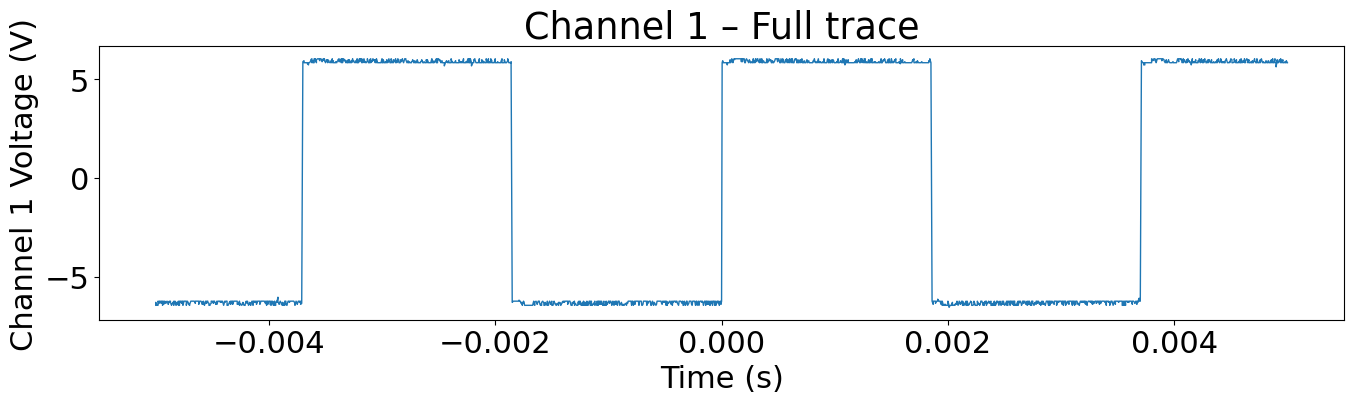

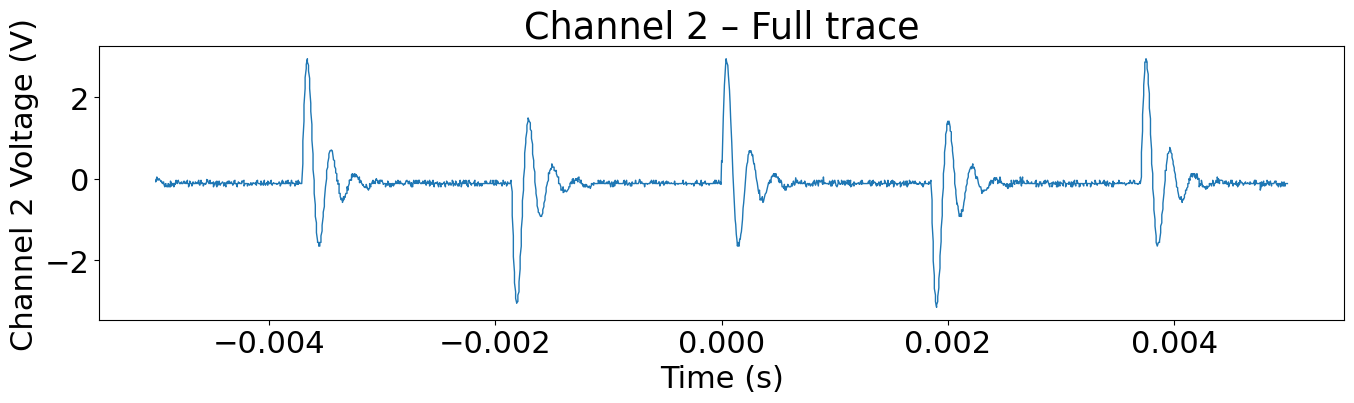

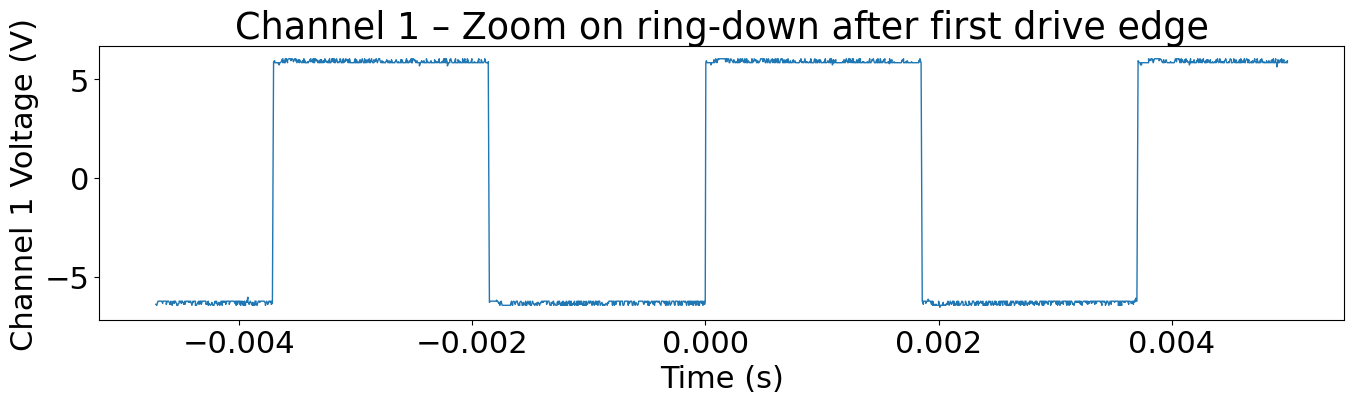

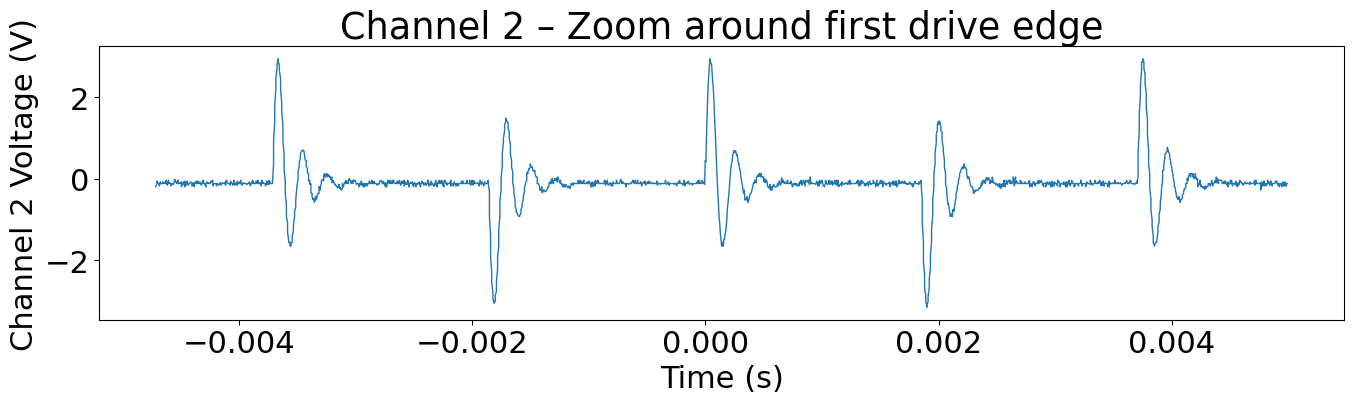

In [191]:


# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_0.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')  # coerce sci-notation strings like '+4.31E-02'
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # your "Measured" channel in the screenshot
ch2 = data['2'].to_numpy()   # your other scope channel (often the drive)

# Optional: strip DC offsets for visual clarity
ch1_dc = ch1 - np.nanmean(ch1)
ch2_dc = ch2 - np.nanmean(ch2)

# --- 2) Plot each channel individually (full record) ---
plt.figure(figsize=(14,4.5))
plt.plot(t, ch1, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Channel 1 Voltage (V)")
plt.title("Channel 1 – Full trace")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,4.5))
plt.plot(t, ch2, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Channel 2 Voltage (V)")
plt.title("Channel 2 – Full trace")
plt.tight_layout()
plt.show()

# --- 3) Zoom around the first rising edge in CH2 to see ring-down on CH1 ---
# We’ll detect a rising edge on CH2 using a simple derivative threshold.
# (This assumes CH2 is the square-wave drive; if not, you can swap channels.)
d2 = np.diff(ch2_dc)
# Use an adaptive threshold: several standard deviations of the derivative
thr = 3*np.nanstd(d2)
edge_idx_candidates = np.where(d2 > thr)[0]

if edge_idx_candidates.size > 0:
    i0 = edge_idx_candidates[0]           # first detected rising edge
    # choose a zoom window around that edge (t0- a little before, to t0 + some ms)
    pre  = 200   # samples before edge to include
    post = 2000  # samples after edge to include (adjust if needed)
    a = max(0, i0 - pre)
    b = min(len(t)-1, i0 + post)

    plt.figure(figsize=(14,4.5))
    plt.plot(t[a:b], ch1[a:b], linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel 1 Voltage (V)")
    plt.title("Channel 1 – Zoom on ring-down after first drive edge")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14,4.5))
    plt.plot(t[a:b], ch2[a:b], linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel 2 Voltage (V)")
    plt.title("Channel 2 – Zoom around first drive edge")
    plt.tight_layout()
    plt.show()
else:
    print("No clear rising edge detected on Channel 2. Try lowering 'thr' or swap channels for edge detection.")

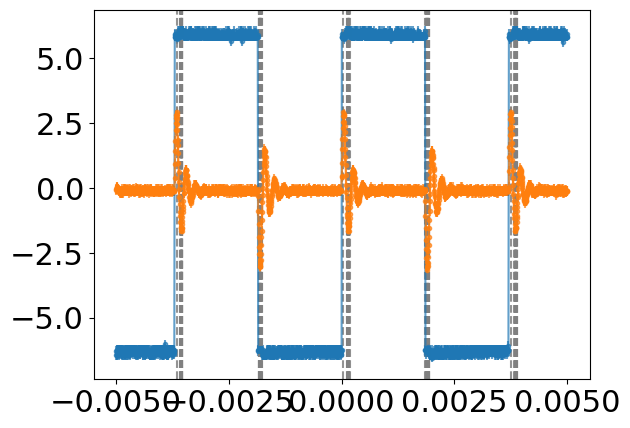

In [192]:
from utils import keysight_unc

v_div = 0.5 # 500mV/div 
vu = keysight_unc(v_div) * np.ones(t.shape)
vu[0]

indices = np.where((ch2 > 2.9) | (ch2 < -1.0))[0]
indices = np.append(indices, len(ch1) - 1)
t[indices]

ch1ch = np.mean(ch1[(indices[1] - 21):(indices[1] - 1)])
ch2ch = np.mean(ch2[(indices[1] - 21):(indices[1] - 1)])

ch2h = np.mean(ch1[indices[0]:indices[1]] + ch2[indices[0]:indices[1]])
ch2h, ch1ch, ch2ch

plt.errorbar(t, ch1, label=r"$V_R$", yerr=vu, marker='.', alpha=0.7)
plt.errorbar(t, ch2, label=r"$V_C$", yerr=vu, marker='.', alpha=0.7)

for idx in indices[:-1]:
    plt.axvline(x=t[idx], color='gray', linestyle='--', alpha=0.85)


In [193]:
# ============================
# Better Underdamped LCR Fit
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.optimize import curve_fit

from utils import keysight_unc  # <-- keep your function

# ---- 1) Load data ----
df = pd.read_csv('data/scope_0.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')

t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # drive (square wave)
ch2 = data['2'].to_numpy()   # response (oscillation)

# ---- 2) Find first rising edge (as you did) ----
d1  = np.diff(ch1 - np.nanmean(ch1))
thr = 3 * np.nanstd(d1)
edge_idx = np.where(d1 > thr)[0]
if edge_idx.size == 0:
    raise RuntimeError("No rising edge found on the drive channel.")
i0 = edge_idx[0]

# ---- 3) Window: skip early-edge distortion, fit the clean tail ----
fs       = 1.0 / np.median(np.diff(t))      # sampling rate (Hz)
t_skip   = 0.00020                          # 0.20 ms after the edge (adjust 0.15–0.30 ms if needed)
posttime = 0.00160                          # total length of the fit window after the edge

a = int(i0 + t_skip*fs)
b = int(i0 + posttime*fs)
a = max(a, 0); b = min(b, len(t))

tt = t[a:b] - t[a]                          # time starts at 0 in window
yy = ch2[a:b].copy()                        # raw response in window

# ---- 4) Remove small baseline (mean of last quiet part) ----
tail = slice(max(0, len(yy) - 250), max(10, len(yy) - 20))  # quiet region near end
baseline = np.mean(yy[tail])
yy -= baseline

# ---- 5) Initial guesses from FFT + Hilbert envelope ----
# Frequency guess
Y  = np.fft.rfft(yy)
f  = np.fft.rfftfreq(len(yy), d=1/fs)
idxpk = 1 + np.argmax(np.abs(Y[1:]))       # ignore DC
f0   = float(f[idxpk]) if np.isfinite(f[idxpk]) else 5_000.0
w0   = 2*np.pi*f0

# Tau guess from envelope slope
z   = hilbert(yy)
E   = np.abs(z)
# Avoid log(0)
Eh  = np.clip(E, 1e-9, None)
m, b_lin = np.polyfit(tt, np.log(Eh), 1)
tau0 = max(5e-4, min(0.5, abs(-1.0/m)))     # clamp to 0.5 ms – 0.5 s

# Amplitude-ish guess
A0  = 0.5*(np.max(yy) - np.min(yy))
# Reparameterize: y = exp(-t/tau)[B cos wt + D sin wt] + C
B0, D0, C0 = A0, 0.0, 0.0

# ---- 6) Build realistic uncertainties (Keysight + noise) for this window ----
# IMPORTANT: set your vertical scale in the UNITS expected by keysight_unc.
# Example: if your scope was at 500 mV/div and keysight_unc expects V/div:
v_div = 0.5       # V/div   (if your function expects mV/div, use v_div = 500)
sigma_scope = float(keysight_unc(v_div)) / 10.0
 # scalar

# after getting y_fit:
residuals = yy - y_fit

# Option 1: residual-based SD (simple)
sigma_noise = float(np.std(residuals))  # random part measured from the quiet tail
sigma_win = float(np.hypot(sigma_scope, sigma_noise))
vu_win = np.full_like(tt, sigma_win)
# refit with curve_fit(..., sigma=vu_win, absolute_sigma=True)


# ---- 7) Re-parameterized model + tight bounds ----
def model_BD(t, B, D, tau, omega, C):
    return np.exp(-t/tau)*(B*np.cos(omega*t) + D*np.sin(omega*t)) + C

# Keep bounds informed by our guesses (prevents wandering solutions)
low  = [-5*A0, -5*A0, 0.3*tau0, 2*np.pi*0.7*f0, -2.0]
high = [ 5*A0,  5*A0, 3.0*tau0, 2*np.pi*1.4*f0,  2.0]
p0   = [B0, D0, tau0, w0, C0]

# ---- 8) Weighted fit with absolute σ ----
params, cov = curve_fit(
    model_BD, tt, yy, p0=p0, bounds=(low, high),
    sigma=vu_win, absolute_sigma=True, maxfev=80000
)
B, D, tau, omega, C = params
perr = np.sqrt(np.diag(cov))

# Convert back to A and phi
A   = np.hypot(B, D)
phi = np.arctan2(-D, B)

fd  = omega/(2*np.pi)
Q   = (omega * tau) / 2

# Uncertainty propagation for A and phi
# (approximate, from covariance of [B, D])
varA  = (B/A)**2 * cov[0,0] + (D/A)**2 * cov[1,1] + 2*(B*D/A**2)*cov[0,1]
Aerr  = np.sqrt(max(varA, 0.0))
# phi = atan2(-D, B) → dphi = sqrt( (∂φ/∂B)^2 Var(B) + (∂φ/∂D)^2 Var(D) + 2 ∂φ/∂B ∂φ/∂D Cov(B,D) )
dphi_dB =  D / (A**2)
dphi_dD =  B / (A**2)
varphi  = dphi_dB**2*cov[0,0] + dphi_dD**2*cov[1,1] + 2*dphi_dB*dphi_dD*cov[0,1]
phierr  = np.sqrt(max(varphi, 0.0))

# Propagate to Q: Q = (omega*tau)/2
Qerr = 0.5*np.sqrt( (tau**2)*cov[3,3] + (omega**2)*cov[2,2] + 2*tau*omega*cov[2,3] )

# ---- 9) Goodness-of-fit (χ² and reduced χ²) ----
y_fit = model_BD(tt, *params)
res   = (yy - y_fit) / sigma_win
chi2  = np.sum(res**2)
dof   = len(yy) - len(params)
chi2r = chi2 / dof

# ---- 10) Report ----
print("\n=== Weighted Fit (re-parameterized) ===")
print(f"A      = {A:.4f} V ± {Aerr:.3g}")
print(f"phi    = {phi:.4f} rad ± {phierr:.3g}")
print(f"tau    = {tau*1e3:.3f} ms ± {perr[2]*1e3:.3g}")
print(f"omega  = {omega:.1f} rad/s  (f = {fd:.1f} Hz) ± {(perr[3]/(2*np.pi)):.1f} Hz")
print(f"C      = {C:.4f} V ± {perr[4]:.3g}")
print(f"Q      = {Q:.2f} ± {Qerr:.2f}")
print(f"sigma_scope = {sigma_scope:.4g} V, sigma_noise = {sigma_noise:.4g} V, sigma_total = {sigma_win:.4g} V")
print(f"chi² = {chi2:.2f},  dof = {dof},  reduced chi² = {chi2r:.2f}")

# ---- 11) Plot: data, fit, and residuals ----
fig = plt.figure(figsize=(11,6))
gs  = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.25)

ax = fig.add_subplot(gs[0,0])
ax.errorbar(tt, yy, yerr=vu_win, fmt='.', ms=3, alpha=0.7, label='Measured')
ax.plot(tt, y_fit, 'r-', lw=2, label='Fitted model')
ax.set_xlabel("Time since drive edge (s)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Underdamped LCR")
ax.legend()
ax.grid(True, ls=':', alpha=0.6)

ax2 = fig.add_subplot(gs[1,0], sharex=ax)
ax2.plot(tt, (yy - y_fit), '.', ms=3, alpha=0.8)
ax2.axhline(0, color='k', lw=1)
ax2.set_ylabel("Residual (V)")
ax2.set_xlabel("Time since drive edge (s)")
ax2.grid(True, ls=':', alpha=0.6)

plt.tight_layout()
plt.show()

# ---------- Plot 1: Data + Fit ----------
plt.figure(figsize=(11,5))
plt.errorbar(tt, yy, yerr=vu_win, fmt='.', ms=3, alpha=0.7, label='Measured')
plt.plot(tt, y_fit, 'r-', lw=2, label='Fitted model')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Underdamped LCR")
plt.legend()
plt.grid(True, ls=':', alpha=0.6)
plt.tight_layout()
plt.show()

# ---------- Plot 2: Residuals (separate figure, WITH error bars) ----------
residuals = yy - y_fit

plt.figure(figsize=(11,4))
plt.errorbar(tt, residuals, yerr=vu_win, fmt='.', ms=3, alpha=0.7, color='steelblue', label='Residuals')
plt.axhline(0, color='red', lw=1, linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Residual (V)")

plt.grid(True, ls=':', alpha=0.9)
plt.legend()
plt.tight_layout()
plt.show()



NameError: name 'y_fit' is not defined

In [ ]:
from utils import meterman37xr_unc

# constants
L = 114.0e-3  # H
R = 1.073e3   # ohm
C = 9.93e-9   # F
Vin = 4.316   # V

inductor_unc = meterman37xr_unc("114.0", "I")
resistor_unc = meterman37xr_unc("1073", "R")
capacitor_unc = meterman37xr_unc("9.93", "C")
battery_unc = meterman37xr_unc("4.316", "V")

# User's measured data
measured = np.array([4.316,4.316,4.317,4.316,4.313,4.309,4.302,4.291,4.271,4.239,
                     4.194,4.162,4.161,4.160,4.159,4.158,4.158,4.1571,4.1575,4.1565,
                     4.1570,4.1575,4.169,4.201,4.231])

# Frequency list (MHz → kHz → Hz)
freq_MHz = np.array([0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4,4.4,4.75,4.775,4.8,4.825,
                     4.85,4.875,4.9,4.925,4.95,4.975,5,5.2,5.6,6])
freq_Hz = freq_MHz * 1000  # convert kHz to Hz

# Measured amplitude ratio
#measured_ratio = measured / Vin

# Theoretical amplitude ratio
omega = 2 * np.pi * freq_Hz
H_theoretical = R / np.sqrt(R**2 + (omega * L - 1/(omega * C))**2)

# Create comparison dataframe
df = pd.DataFrame({
    "Freq_kHz": freq_MHz,
    "V_measured_V": output_volt,
    "Measured_Ratio_ch1/Vin": np.round(amplitude, 6),
    "Theoretical_Ratio": np.round(H_theoretical, 6)
})

# Save CSV
#outfile = "/mnt/data/theoretical_vs_measured_ratio_exact_freq.csv"
#df.to_csv(outfile, index=False)


plt.figure(figsize=(12,6))
plt.plot(freq_MHz, H_theoretical, label="Theoretical", linewidth=2)
plt.plot(values_list, amplitude,label="Measured Data", linewidth=2)
#plt.show()
plt.scatter(freq_MHz, amplitude, color="red", s=35, label="Measured")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude Ratio $V_R/V_{in}$")
plt.title("Measured vs Theoretical Amplitude Ratio (Series LCR)")
plt.legend()
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()

#plot_path = "/mnt/data/measured_vs_theoretical_plot.png"
#plt.savefig(plot_path, dpi=150)
plt.show()

#df.head(10), outfile, plot_path